In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  sklearn as skl
import seaborn as sns
sns.set_style("whitegrid")

In [19]:
data = pd.read_csv("IPL Matches 2008-2020.csv")[["team1","team2","toss_winner","toss_decision","winner","result"]]
data

,team1,team2,toss_winner,toss_decision,winner,result
0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs
2,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets
3,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets
4,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets
...,...,...,...,...,...,...
811,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie
812,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs
813,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets
814,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs


In [20]:
data.describe()

,team1,team2,toss_winner,toss_decision,winner,result
count,816,816,816,816,812,812
unique,15,15,15,2,15,3
top,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets
freq,108,106,106,496,120,435


In [21]:
data.isnull().sum()

team1            0
team2            0
toss_winner      0
toss_decision    0
winner           4
result           4
dtype: int64

In [22]:
data.dropna()

,team1,team2,toss_winner,toss_decision,winner,result
0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs
2,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets
3,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets
4,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets
...,...,...,...,...,...,...
811,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie
812,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs
813,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets
814,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs


In [23]:
print(data["team1"].nunique())
print(data["team1"].unique())

15
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [24]:
l=len(data["team1"])
for i in range(l):
    if data["team1"][i]=="Rising Pune Supergiant":data["team1"][i]="Rising Pune Supergiants"
    elif data["team1"][i]=='Deccan Chargers':data["team1"][i]='Sunrisers Hyderabad'
    elif data["team1"][i]=='Delhi Daredevils':data["team1"][i]='Delhi Capitals'
        
    if data["team2"][i]=="Rising Pune Supergiant":data["team2"][i]="Rising Pune Supergiants"
    elif data["team2"][i]=='Deccan Chargers':data["team2"][i]='Sunrisers Hyderabad'
    elif data["team2"][i]=='Delhi Daredevils':data["team2"][i]='Delhi Capitals'
    
    if data["winner"][i]=="Rising Pune Supergiant":data["winner"][i]="Rising Pune Supergiants"
    elif data["winner"][i]=='Deccan Chargers':data["winner"][i]='Sunrisers Hyderabad'
    elif data["winner"][i]=='Delhi Daredevils':data["winner"][i]='Delhi Capitals'

In [25]:
print(data["team1"].nunique())
print(data["team1"].unique())

12
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Sunrisers Hyderabad' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Gujarat Lions' 'Rising Pune Supergiants']


Text(0.5, 1.0, 'Number of  IPL  matches won by each team')

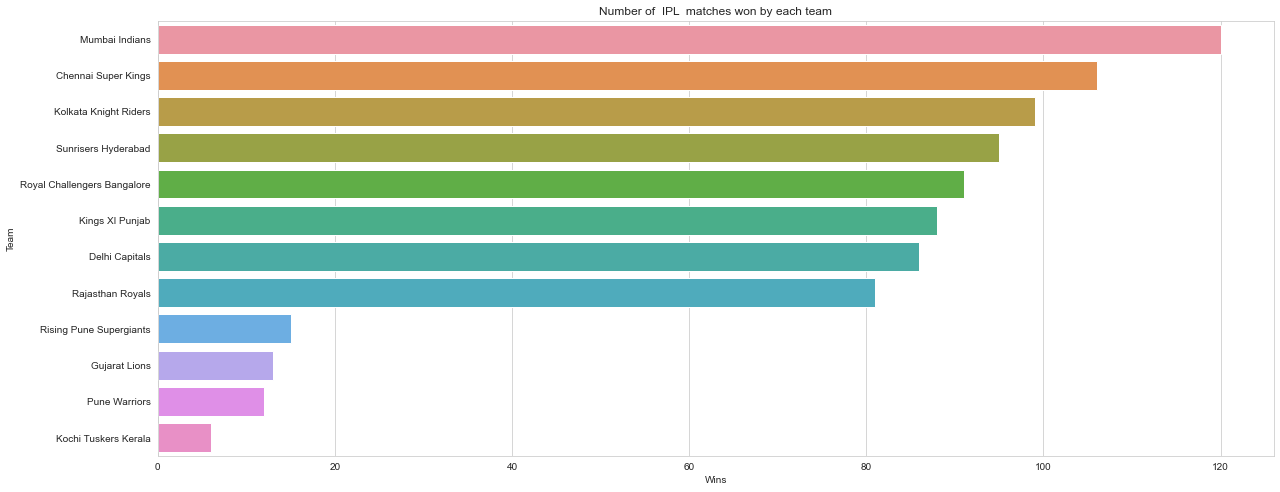

In [26]:
plt.figure(figsize=(20,8))

sns.countplot(y="winner",data=data,order=data["winner"].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')

Text(0.5, 1.0, 'Toss Decision')

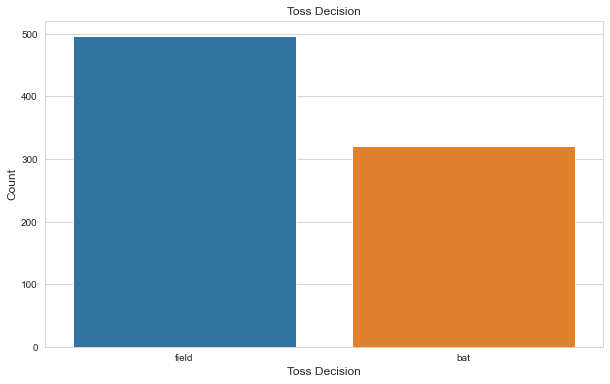

In [27]:
plt.figure(figsize = (10,6))
sns.countplot(x = "toss_decision", data=data)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

In [74]:
# X=data.drop("winner",axis=1)
X=data[["team1","team2"]]
y=data["winner"]
X = pd.get_dummies(X, ["team1","team2"], drop_first = True)
X

,team1_Delhi Capitals,team1_Gujarat Lions,team1_Kings XI Punjab,team1_Kochi Tuskers Kerala,team1_Kolkata Knight Riders,team1_Mumbai Indians,team1_Pune Warriors,team1_Rajasthan Royals,team1_Rising Pune Supergiants,team1_Royal Challengers Bangalore,...,team2_Gujarat Lions,team2_Kings XI Punjab,team2_Kochi Tuskers Kerala,team2_Kolkata Knight Riders,team2_Mumbai Indians,team2_Pune Warriors,team2_Rajasthan Royals,team2_Rising Pune Supergiants,team2_Royal Challengers Bangalore,team2_Sunrisers Hyderabad
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
812,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
813,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
814,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [92]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300,min_samples_split=3,
                               max_features = "auto")

In [93]:
model.fit(x_train, y_train)

C:\Users\nares\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_split=3,
                       n_estimators=300)

In [96]:
y_pred = model.predict(x_test)
print(model.predict(x_test))

[ 0  6  6  8  6  5  0  6  8 11  6  6  5  6  7  1  8  5 10 10  8  5  0  1
  9  8 11 10  0  9 11  6  9  6  8  1  3  0  8  6 10  2  5  6  1  6  6  0
  0  3  0  3  8 11  6  8 10  0  0  1  8 10  0  5  6  0  8  1  8  5  5  0
  6  1  5 11  6 10  0  5  3  8 10  0  6  6  3  6  6  5  5  0  0  3  8  0
  0  6  0  1 10 11 11  1  0  8  5  0 11  5  5 11  6 11  3 11 10  5 10  0
 10  5  8  0  0  6  1 11  1 11  1  9  1 11  6  1  5 10 10  3  0 10 10  8
 10  0  7  1  0 11  8  8  0  5  0 10  1 10  8  0  5 11  0 11]


In [98]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_pred, y_test)